<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/08_2_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## **VGG Blocks**

Blocks with multiple 3×3 convolutions before downsampling via max-pooling. They demonstrated that deeper, narrower networks outperform shallow, wide ones, making stacking 3×3 convolutions a standard design.

A VGG block consists of several 3×3 convolutions with padding (preserving dimensions) followed by a 2×2 max-pooling layer with a stride of 2 (halving dimensions).

In [2]:
def vgg_block(num_convs, out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
    layers.append(nn.ReKU())
  layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
  return nn.Sequential(*layers)

## **VGG Network**

Like AlexNet and LeNet, the VGG Network can be partitioned into two parts: the first
consisting mostly of convolutional and pooling layers and the second consisting of fullyconnected layers that are identical to those in AlexNet. The key difference is that the convolutional
layers are grouped in nonlinear transformations that leave the dimensonality unchanged.

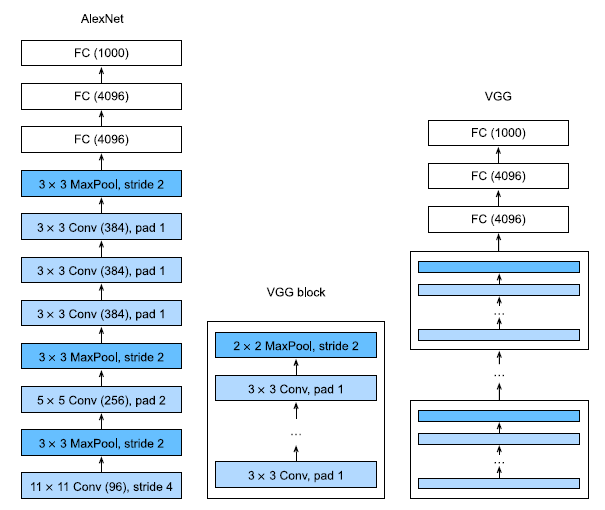

The original VGG network had five convolutional blocks, among which the first two have
one convolutional layer each and the latter three contain two convolutional layers each. The
first block has 64 output channels and each subsequent block doubles the number of output
channels, until that number reaches 512. Since this network uses eight convolutional layers
and three fully connected layers, it is often called VGG-11.

In [3]:
class VGG(d2l.Classifier):
  def __init__(self, arch, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    conv_blks = []
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs, out_channels))
      self.net = nn.Sequential(
      *conv_blks, nn.Flatten(),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
      nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)